In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
df = pd.read_csv('benchmark.csv', quotechar='"', escapechar='\\', skipinitialspace=True)
df_removes_too = pd.read_csv('benchmark_w_rm.csv')
df['roles'] = df['roles'].apply(lambda x: eval(x))
display(df.head())


,action,actor,ms,members,n_roles,team_key_gen,roles
0,networking.init,founder,135,1,2,NaN,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
1,invites.create,founder,1,1,2,NaN,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
2,UserService.createFromInviteSeed,b0,2,0,0,NaN,{}
3,invites.admitMemberFromInvite,founder,3,2,2,NaN,"[{'roleName': 'admin', 'generation': 0}, {'rol..."
4,team.save,founder,1,2,2,NaN,"[{'roleName': 'admin', 'generation': 0}, {'rol..."


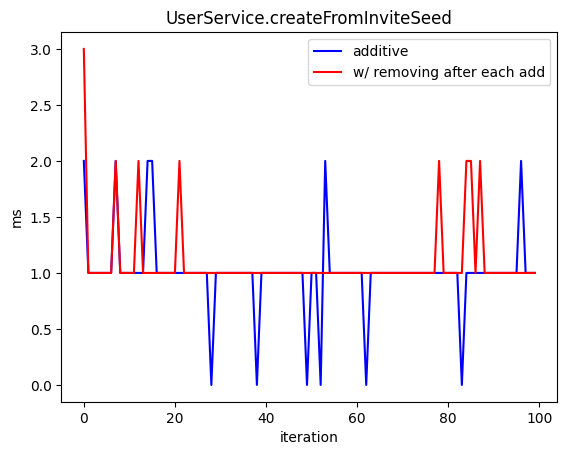

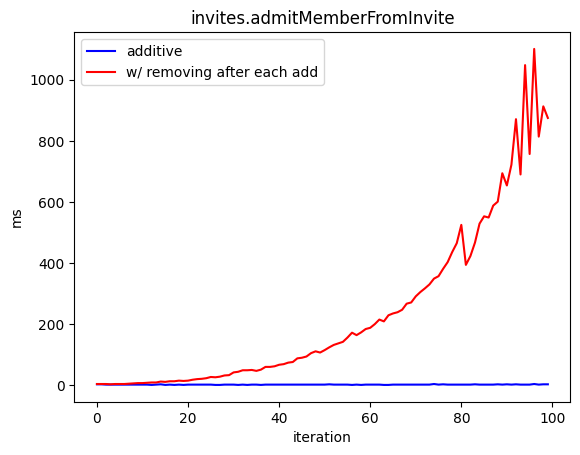

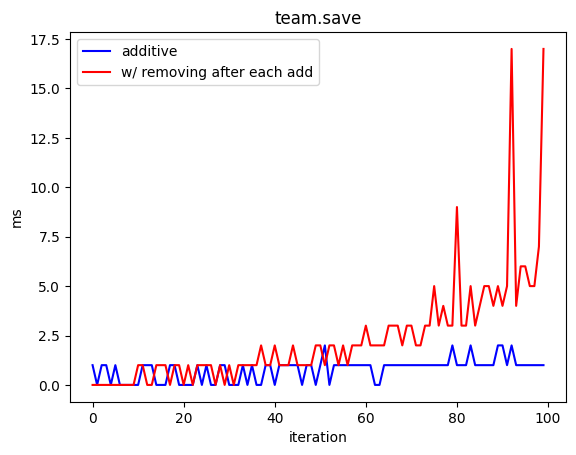

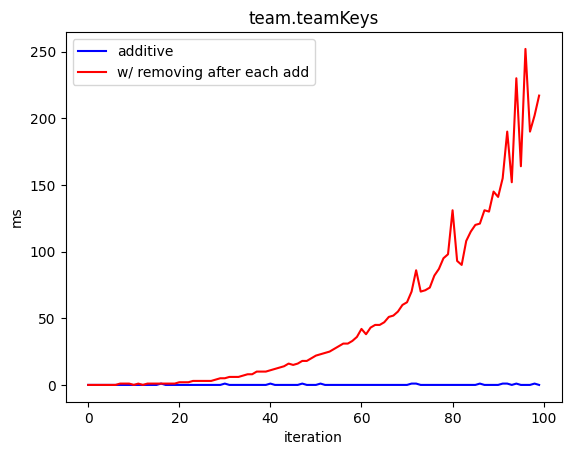

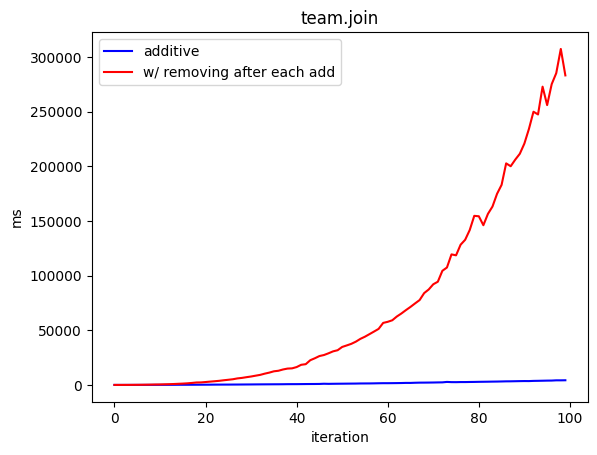

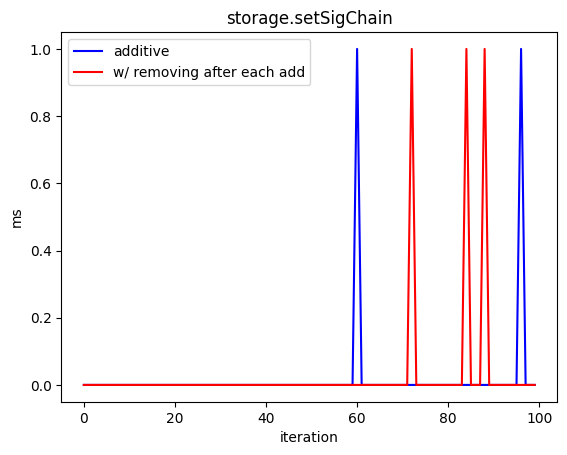

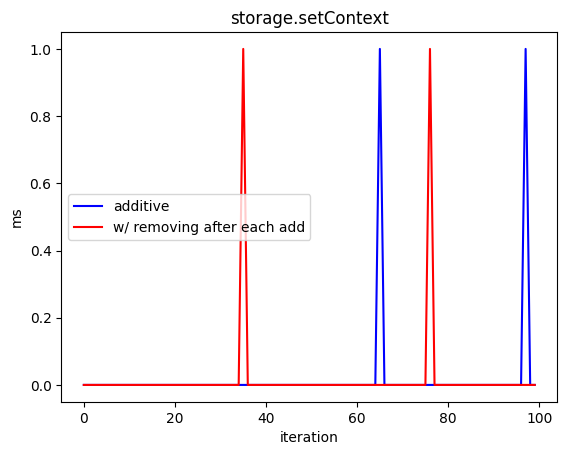

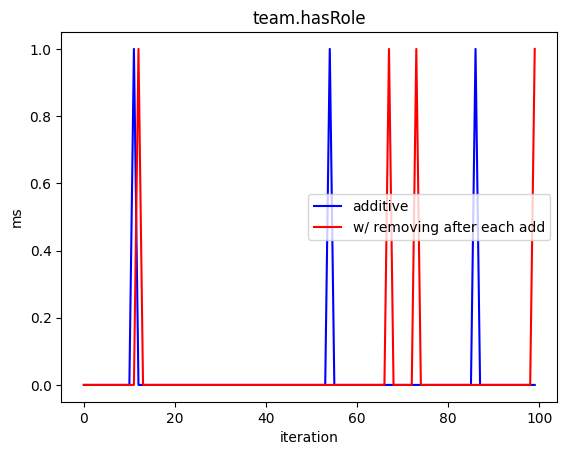

In [37]:
for action in df['action'].unique():
    if len(df[df['action'] == action]) < 2:
        continue
    action_df = df[df['action'] == action]
    action_df = action_df.reset_index(drop=True)
    action_2_df = df_removes_too[df_removes_too['action'] == action]
    action_2_df = action_2_df.reset_index(drop=True)
    # display(action_df.head())
    # plot
    fig, ax = plt.subplots()
    ax.plot(action_df.index, action_df['ms'], label='additive', color='blue')
    ax.plot(action_2_df.index, action_2_df['ms'], label='w/ removing after each add', color='red')
    ax.set_xlabel('iteration')
    ax.set_ylabel('ms')
    ax.set_title(action)
    ax.legend()
    plt.savefig(f'{action}_both.png')

NameError: name 'role_template' is not defined

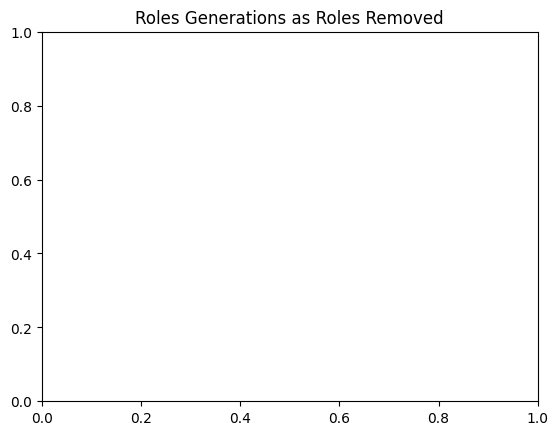

In [22]:
import json
# each row is a dict of roles
remove_roles = df[df['action'] == 'users.remove']
remove_roles = remove_roles.reset_index(drop=True)
roles = remove_roles['roles']
# extract the roleName and generation of each role in each row
for i in range(len(roles)):
    role_template = roles[i]
    if role_template:
        break

fig, ax = plt.subplots()
ax.set_title('Roles Generations as Roles Removed')
for i, role in enumerate(role_template):
    print(role)
    role_name = role['roleName']
    ax.plot(remove_roles.index, remove_roles['roles'].apply(lambda x: x[i]['generation']), label=role_name)

ax.legend()
plt.show()
